In [ ]:
pip install seaborn

In [ ]:
# Import libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset and create new dataframe with selected columns
df = pd.read_csv('/content/drive/MyDrive/DL_Lab/Au_nanoparticle_dataset.csv')

In [ ]:
new_df1 = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']]

In [ ]:
# Display first 20 samples
print("First 20 samples of the filtered dataframe:")
new_df1.head(20)

First 20 samples of the filtered dataframe:


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [ ]:
# Calculate statistics
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DL_Lab/Au_nanoparticle_dataset.csv')
new_df = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']].copy()
new_df = new_df.loc[:, ~new_df.columns.duplicated()]

stats = new_df.agg({
    'N_total': ['mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
    'N_bulk': ['mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
    'N_surface': ['mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
    'R_avg': ['mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
})

stats.index = ['Mean', 'Std Dev', '25% (Q1)', '50% (Median)', '75% (Q3)']

print("\nDescriptive Statistics:")
display(stats.style.format("{:.2f}"))


Descriptive Statistics:


,N_total,N_bulk,N_surface,R_avg
Mean,3476.79,2521.55,955.24,20.65
Std Dev,3679.29,2976.23,721.87,7.61
25% (Q1),1061.00,618.75,437.00,15.16
50% (Median),1867.00,1199.00,666.00,18.63
75% (Q3),4503.00,3183.00,1301.75,25.53


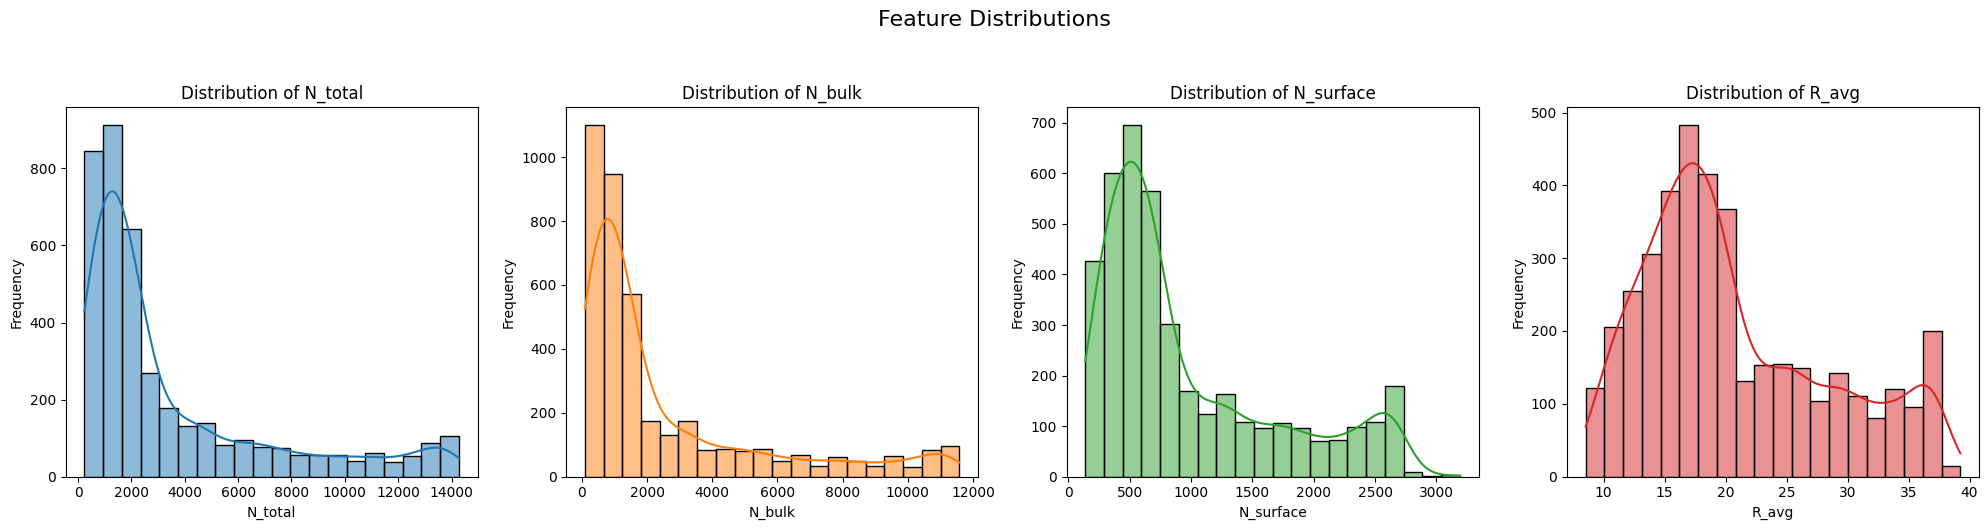

In [ ]:
# Plot histograms in 1x4 layout
plt.figure(figsize=(20, 5))
plt.suptitle('Feature Distributions', fontsize=16, y=1.05)

features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, (col, color) in enumerate(zip(features, colors)):
    plt.subplot(1, 4, i+1)
    sns.histplot(new_df[col], kde=True, color=color, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

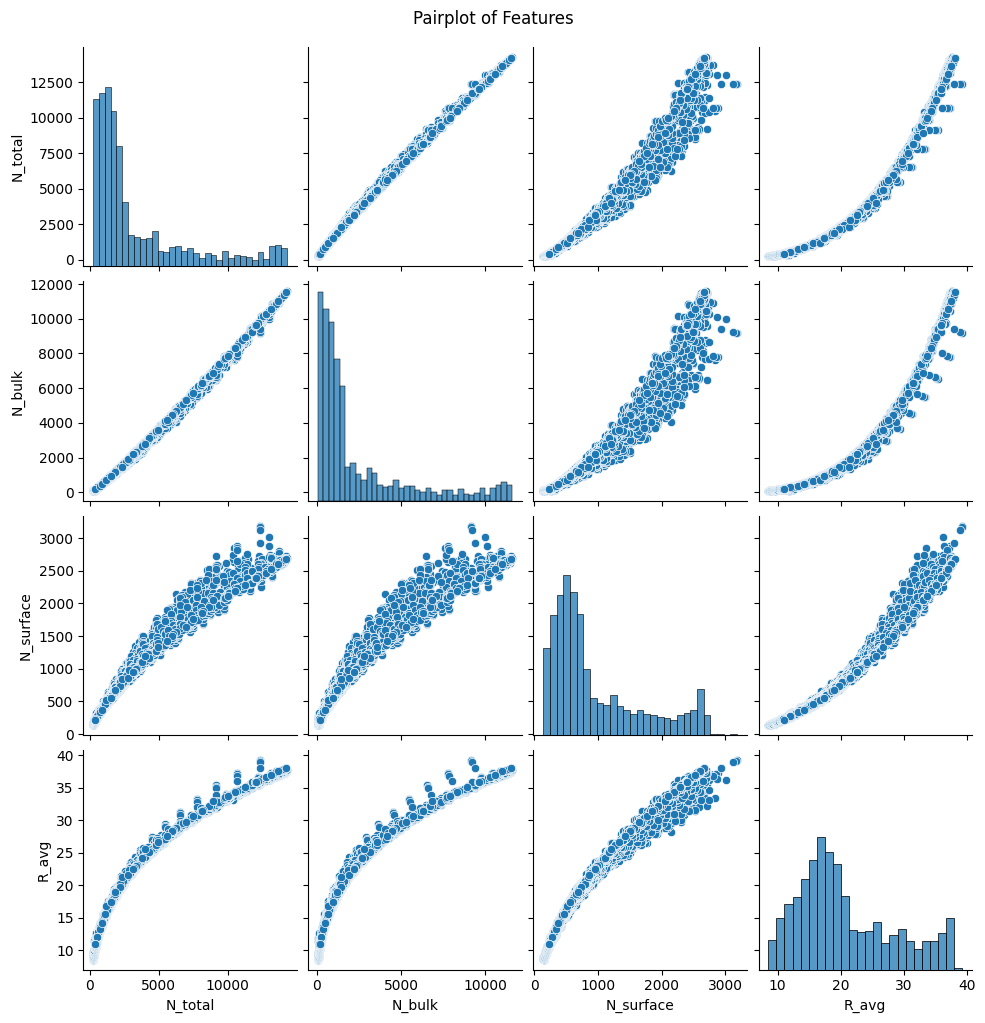

In [ ]:
# Create pairplot
sns.pairplot(new_df)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

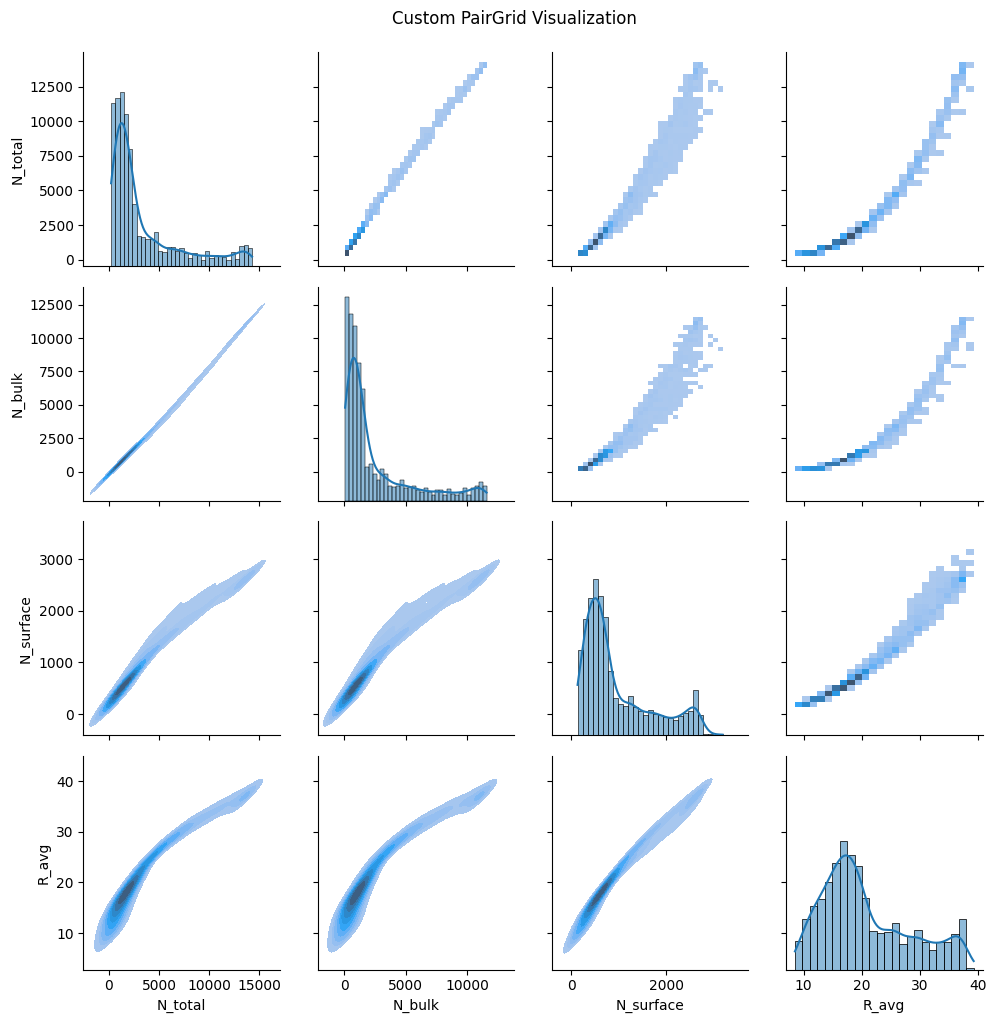

In [ ]:
# Custom PairGrid visualization
g = sns.PairGrid(new_df)
g.map_upper(sns.histplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.kdeplot, fill=True)
plt.suptitle('Custom PairGrid Visualization', y=1.02)
plt.show()